In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#data is from kaggle https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis/data
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df.drop(columns={'CustomerID'}, inplace = True)
df.rename(columns={'Annual Income (k$)': 'income','Spending Score (1-100)': 'score'}, inplace = True)
df.columns = df.columns.str.lower()
df

,gender,age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  200 non-null    int64
 1   age     200 non-null    int64
 2   income  200 non-null    int64
 3   score   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,gender,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


# ======== EDA ========

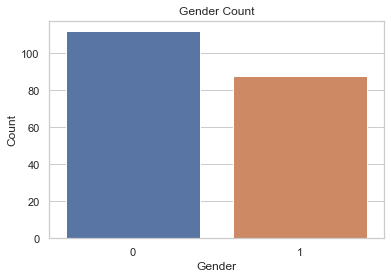

In [5]:
sns.set_theme(style="whitegrid")
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')
plt.show()

In [54]:
df.groupby('gender').mean()

,age,income,score
gender,,,
0,38.098214,59.250000,51.526786
1,39.806818,62.227273,48.511364


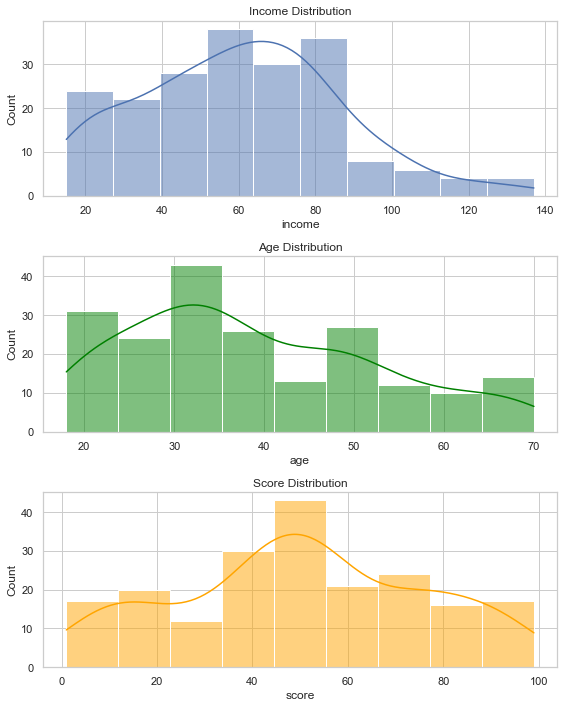

In [59]:
f, axes = plt.subplots(3,1, figsize =(8,10))

fig1 = sns.histplot(data=df, x= 'income', kde= True, ax= axes[0])
fig1.set_title('Income Distribution')

fig2 = sns.histplot(data=df, x= 'age', kde= True, ax= axes[1], color='green')
fig2.set_title('Age Distribution')

fig2 = sns.histplot(data=df, x= 'score', kde= True, ax= axes[2], color='orange')
fig2.set_title('Score Distribution')


plt.tight_layout()
plt.show()

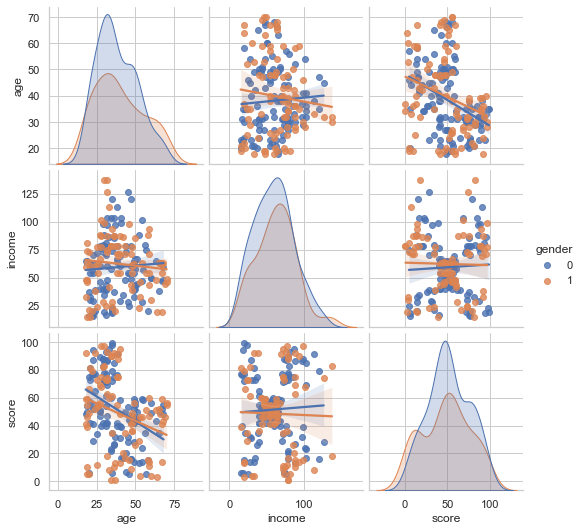

In [7]:
sns.pairplot(data=df, kind='reg', hue='gender')

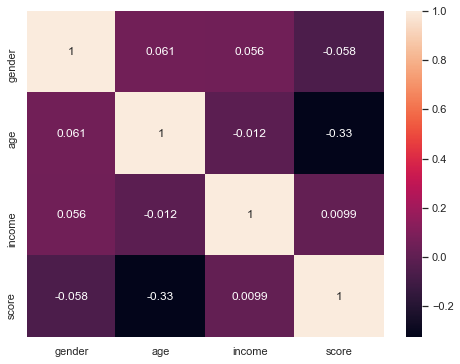

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(method='pearson'),annot=True)
plt.show()

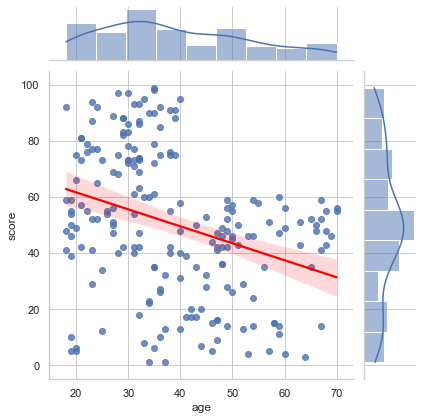

In [9]:
sns.jointplot(data=df,
              x="age",
              y="score", 
              kind ="reg", 
              joint_kws = {"line_kws":{"color":"red"}})
plt.show()

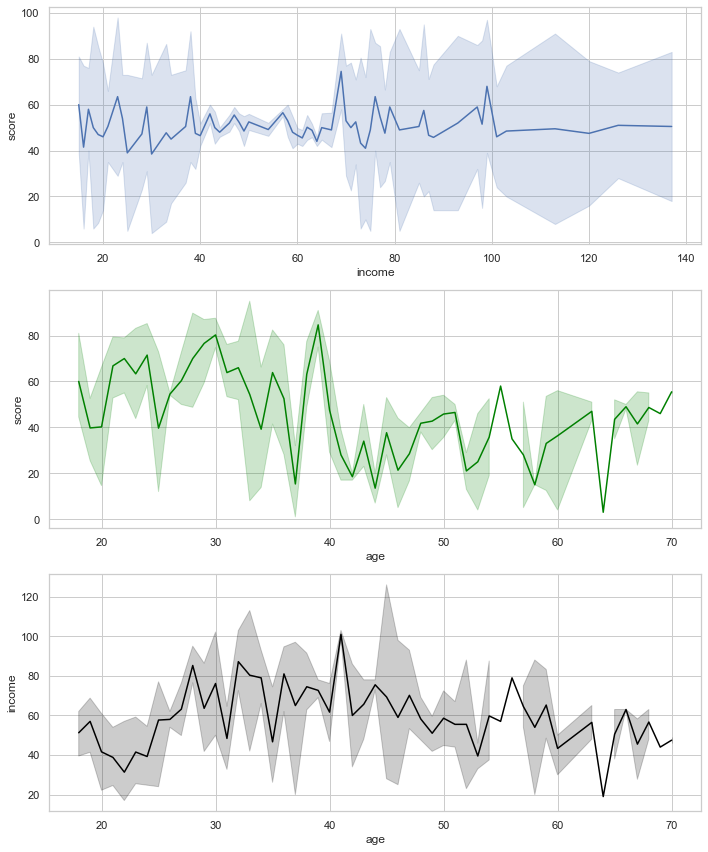

In [10]:
f, axes = plt.subplots(3,1, figsize =(10,12))
fig1 = sns.lineplot(data=df, x='income', y='score', ax=axes[0])
fig2 = sns.lineplot(data=df, x='age', y='score', ax=axes[1], color='green')
fig3 = sns.lineplot(data=df, x='age', y='income', ax=axes[2], color='black')

plt.tight_layout()
plt.show()

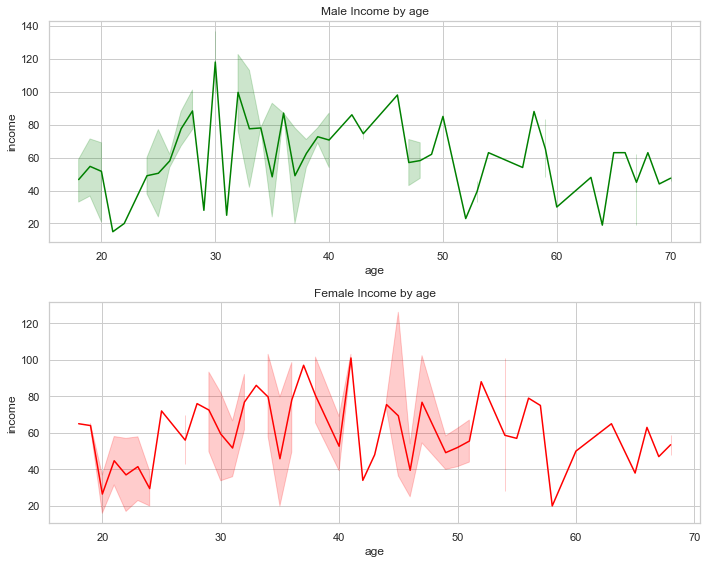

In [11]:
f, axes = plt.subplots(2,1, figsize =(10,8))

fig1= sns.lineplot(data=df[df['gender']==1], x='age', y='income', ax=axes[0],color='green')
fig1.set_title('Male Income by age')
fig2= sns.lineplot(data=df[df['gender']==0], x='age', y='income', ax=axes[1], color='red')
fig2.set_title('Female Income by age')

plt.tight_layout()
plt.show()

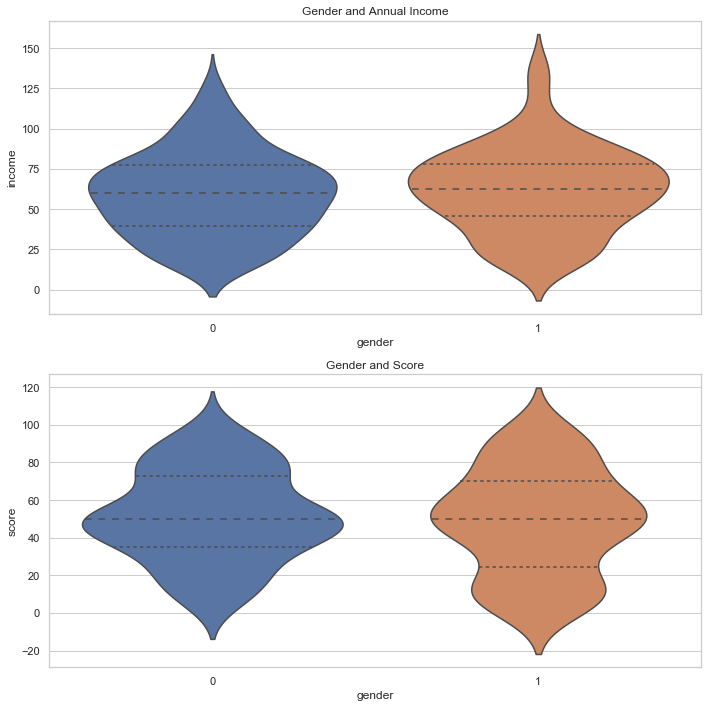

In [12]:
f, axes = plt.subplots(2,1, figsize =(10,10))

fig1 = sns.violinplot(data=df, x= 'gender', y= 'income', inner = 'quartile', ax=axes[0])
fig1.set_title('Gender and Annual Income')

fig2=sns.violinplot(data=df, x='gender', y='score', inner = 'quartile', ax=axes[1])
fig2.set_title('Gender and Score')

plt.tight_layout()
plt.show()

In [13]:
def age_range(age):
    if age<=25: return 'under 26'
    elif age<=35: return '26-35'
    elif age<=45: return '36-45'
    elif age<=55: return '46-55'
    elif age<=65: return '56-65'
    else: return '66+'

group = df.copy()
group['age group'] = group['age'].apply(age_range)
group.head(5)

,gender,age,income,score,age group
0,1,19,15,39,under 26
1,1,21,15,81,under 26
2,0,20,16,6,under 26
3,0,23,16,77,under 26
4,0,31,17,40,26-35


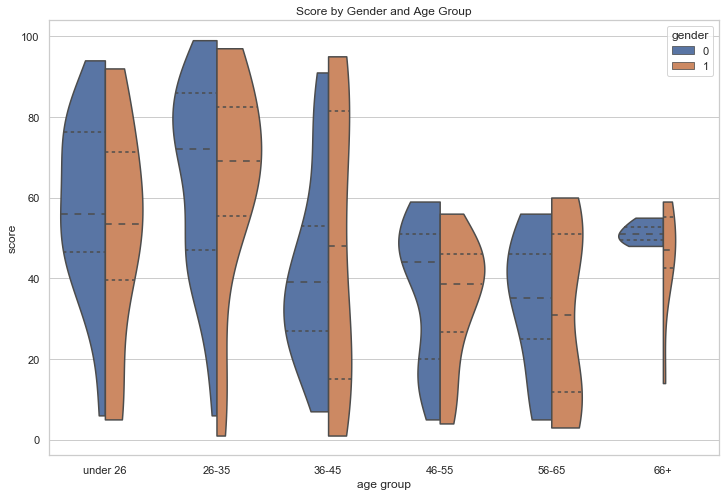

In [14]:
plt.figure(figsize=(12,8))
sns.violinplot(data=group, x='age group', y='score', 
               inner = 'quartile',
               hue='gender',
               split=True,
               cut=0,
              order=['under 26','26-35','36-45','46-55','56-65','66+'])
plt.title('Score by Gender and Age Group')
plt.show()

# Clustering


In [48]:
from sklearn import cluster

cls = cluster.KMeans(n_clusters = 5)
cls.fit(df)

KMeans(n_clusters=5)

In [16]:
result = df.copy()

result['class'] = cls.labels_
result.head(5)

,gender,age,income,score,class
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


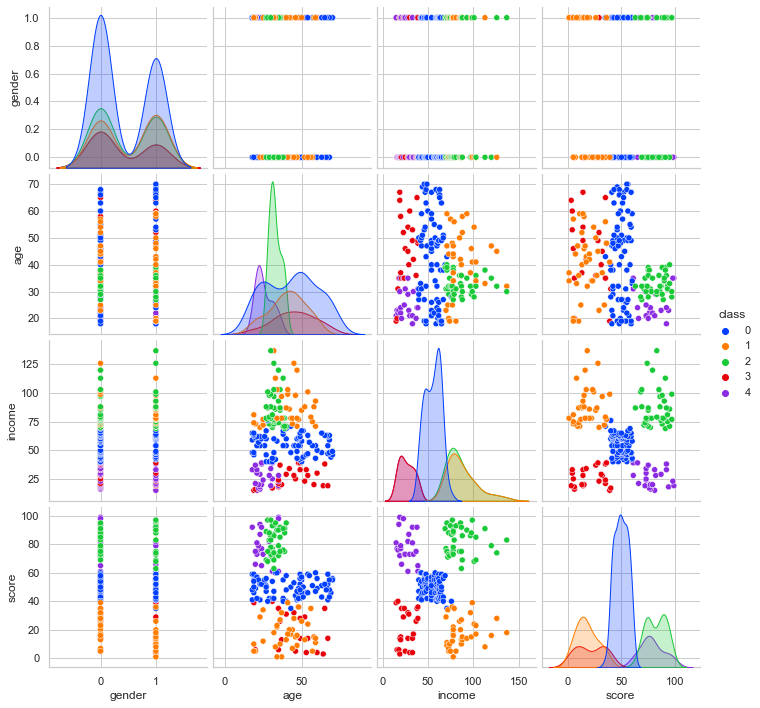

In [23]:
sns.pairplot(data = result,hue='class', palette='bright')

In [29]:
from sklearn.metrics import silhouette_score

silhouette_score(X=df, labels=cls.labels_)

0.4440669204743008

# Find best number of cluster

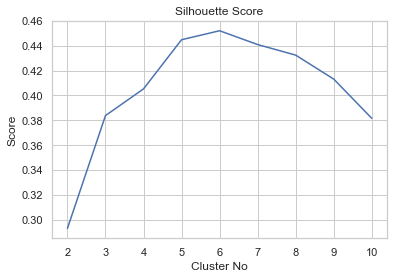

In [44]:
kno=[]

for i in range(2,11):
    cls = cluster.KMeans(n_clusters = i)
    cls.fit(df)
    score = silhouette_score(X=df, labels=cls.labels_)
    kno.append(score)
    
plt.plot(range(2,11), kno)
plt.ylabel('Score')
plt.xlabel('Cluster No')
plt.title('Silhouette Score')
plt.show()

0.45205475380756527


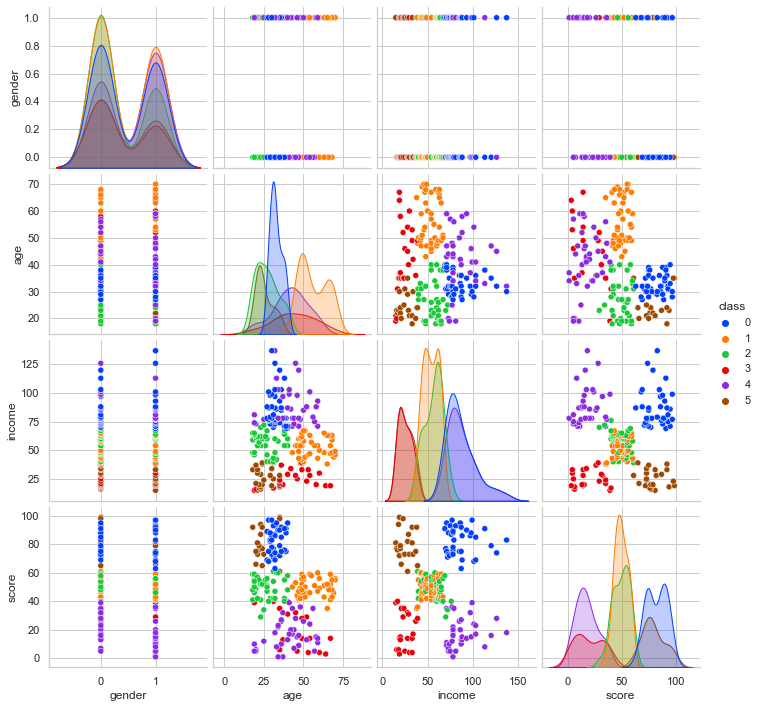

In [99]:
best = df.copy()

kmeans = cluster.KMeans(n_clusters = 6)
kmeans.fit(best)
score = silhouette_score(X=best, labels=kmeans.labels_)
print (score)

best['class'] = kmeans.labels_

sns.pairplot(data = best,hue='class', palette='bright')
plt.show()

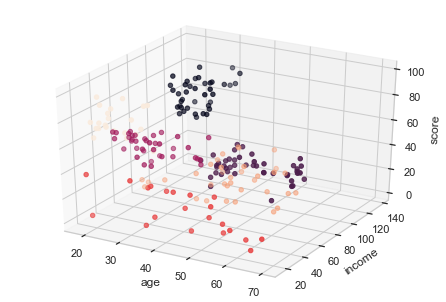

In [100]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(best['age'],best['income'], best['score'], c=best['class'])
ax.set_xlabel("age")
ax.set_ylabel("income")
ax.set_zlabel("score")
plt.show()

In [101]:
import plotly.express as px

fig = px.scatter_3d(best, x='age', y='income', z='score', color = 'class')#, symbol='gender')
fig.show()

#save file
fig.write_html('./clustering3d.html')

In [106]:
best

,gender,age,income,score,class
0,1,19,15,39,3
1,1,21,15,81,5
2,0,20,16,6,3
3,0,23,16,77,5
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,4
197,1,32,126,74,0
198,1,32,137,18,4


In [110]:
cls = best.copy()
#cls.drop(columns={'gender'})

cls.groupby(['class','gender']).mean()

age     income      score
class gender                                 
0     0       32.190476  86.047619  81.666667
      1       33.277778  87.111111  82.666667
1     0       54.080000  53.240000  49.520000
      1       58.750000  53.550000  48.550000
2     0       27.960000  57.360000  47.120000
      1       25.153846  55.307692  53.000000
3     0       41.538462  26.538462  20.692308
      1       48.375000  22.875000  17.625000
4     0       44.600000  92.333333  21.600000
      1       39.500000  85.150000  14.050000
5     0       25.461538  25.692308  80.538462
      1       25.000000  25.777778  77.666667

In [127]:
cls.iloc[:,1:5].groupby('class').mean()

,age,income,score
class,,,
0,32.692308,86.538462,82.128205
1,56.155556,53.377778,49.088889
2,27.000000,56.657895,49.131579
3,44.142857,25.142857,19.523810
4,41.685714,88.228571,17.285714
5,25.272727,25.727273,79.363636
